<a href="https://colab.research.google.com/github/Pushkar0655g/STML/blob/main/STML_A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


<ipython-input-8-b3b5e4d3ef28>:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(boot, label=f'{name} Accuracy Bootstrap', shade=True)
<ipython-input-8-b3b5e4d3ef28>:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(boot, label=f'{name} Accuracy Bootstrap', shade=True)
<ipython-input-8-b3b5e4d3ef28>:47: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(boot, label=f'{name} Accuracy Bootstrap', shade=True)


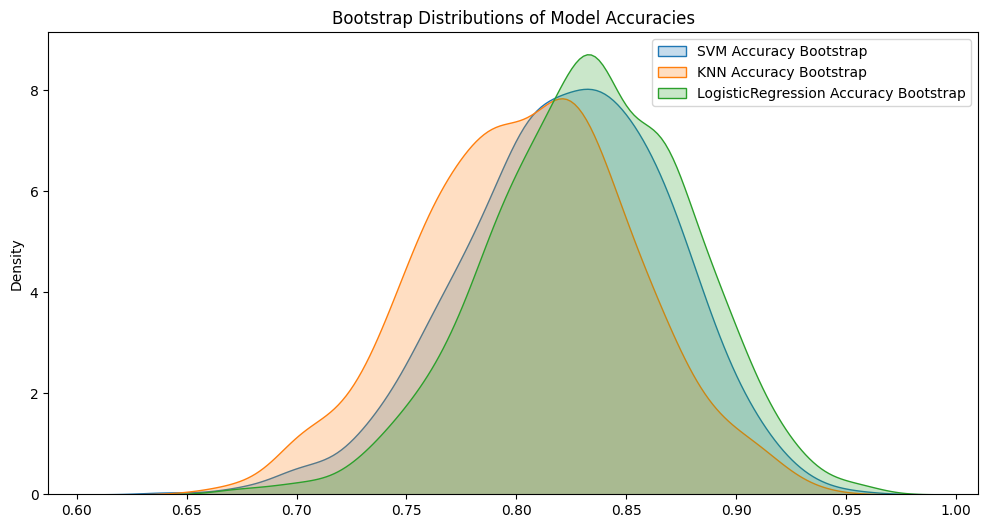

Model Accuracies: {'SVM': 0.8208955223880597, 'KNN': 0.8059701492537313, 'LogisticRegression': 0.835820895522388}


In [8]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/breast_cancer_survival.csv')
data = pd.get_dummies(data, drop_first=True)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

results = {}
bootstraps = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy

    boot_accuracy = []
    for _ in range(1000):
        boot_X, boot_y = resample(X_test, y_test)
        boot_pred = model.predict(boot_X)
        boot_accuracy.append(accuracy_score(boot_y, boot_pred))
    bootstraps[name] = boot_accuracy

plt.figure(figsize=(12, 6))
for name, boot in bootstraps.items():
    sns.kdeplot(boot, label=f'{name} Accuracy Bootstrap', shade=True)
plt.legend()
plt.title('Bootstrap Distributions of Model Accuracies')
plt.show()

print("Model Accuracies:", results)
